# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Exponentiality-of-the-lifetimes-distributions" data-toc-modified-id="Exponentiality-of-the-lifetimes-distributions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exponentiality of the lifetimes distributions</a></div><div class="lev2 toc-item"><a href="#load-data" data-toc-modified-id="load-data-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>load data</a></div><div class="lev2 toc-item"><a href="#Calculate-first-and-second-moments-of-lifetime-distributions" data-toc-modified-id="Calculate-first-and-second-moments-of-lifetime-distributions-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Calculate first and second moments of lifetime distributions</a></div><div class="lev1 toc-item"><a href="#Visual-check-of-the-lifetime-distribution" data-toc-modified-id="Visual-check-of-the-lifetime-distribution-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visual check of the lifetime distribution</a></div>

In [110]:
%matplotlib inline

# Exponentiality of the lifetimes distributions

## load data

In [111]:
! ls -lrt  ../lifetime_ar/*/ | tail

-rw-r--r-- 1 lustelzl tb 66000 Jan 27 13:26 lifetime_dt10_ala_c_md.txt
-rw-r--r-- 1 lustelzl tb 48600 Jan 27 13:26 lifetime_dt50_ala_c_md.txt
-rw-r--r-- 1 lustelzl tb 72750 Jan 27 13:26 lifetime_dt1_ala_c_md.txt
-rw-r--r-- 1 lustelzl tb 71475 Jan 27 13:26 lifetime_dt2_ala_c_md.txt
-rw-r--r-- 1 lustelzl tb 69225 Jan 27 13:26 lifetime_dt5_ala_c_md.txt
-rw-r--r-- 1 lustelzl tb 57900 Jan 27 13:26 lifetime_dt25_ala_c_md.txt
-rw-r--r-- 1 lustelzl tb 35775 Jan 27 13:26 lifetime_dt100_ala_c_md.txt
-rw-r--r-- 1 lustelzl tb  4575 Jan 27 13:26 lifetime_dt1000_ala_c_md.txt
-rw-r--r-- 1 lustelzl tb  9750 Jan 27 13:26 lifetime_dt500_ala_c_md.txt
-rw-r--r-- 1 lustelzl tb  2100 Jan 27 13:26 lifetime_dt2500_ala_c_md.txt


In [112]:
lag_time_l = [1, 2, 5, 10, 20, 25, 50, 100, 200, 500, 1000, 2500, 5000]

In [113]:
remd_dt_hdw_d = {}
remd_dt_cdw_d = {}

for k in lag_time_l:
    #print k
    #wa_tau_a_ar = np.column_stack((v.weight.values, v.weight.values / sum(v.weight.values),  v.wait_T.values))
    w_tau_a_ar = np.genfromtxt("../lifetime_ar/helix/lifetime_dt{}_ala_h.txt".format(k))
    remd_dt_hdw_d[k] = w_tau_a_ar
    
    w_tau_a_ar = np.genfromtxt("../lifetime_ar/coil/lifetime_dt{}_ala_h.txt".format(k))
    #np.savetxt("lifetime_ar/coil/lifetime_dt{}_ala_h.txt".format(k), wa_tau_a_ar)
    remd_dt_cdw_d[k] = w_tau_a_ar 

In [114]:
md_dt_hdw_d = {}
md_dt_cdw_d = {}

for k in lag_time_l:
    w_tau_a_ar = np.genfromtxt("../lifetime_ar/helix/lifetime_dt{}_ala_h_md.txt".format(k))
    md_dt_hdw_d[k] = w_tau_a_ar  
    
    ar = np.genfromtxt("../lifetime_ar/coil/lifetime_dt{}_ala_c_md.txt".format(k))
    md_dt_cdw_d[k] = ar

should also load the lifetimes distributions presented in Figure $.

## Calculate first and second moments of lifetime distributions

The lifetimes are scaled by $w_i$, to constitute a the wait for a single transition event.

\begin{equation}
\tau_i = \frac{\tilde{\tau}_i}{w_i}
\end{equation}

$\tau_i$ enters the lifetime distribution with weight $w_i$

\begin{equation}
\langle \tau \rangle = \frac{\sum_i w_i \tau_i}{\sum_i w_i} = \frac{\sum_i \tilde{\tau}_i}{\sum_i w_i}
\end{equation}

This is equivalent to the definition of $k_{mn} = N_{mn}/t_n $. Entering the lifetimes with a weight $w_i$ thus ensures that the mean lifetime is equal to the inverse rate coefficient.

\begin{equation}
\langle \tau^2 \rangle = \frac{\sum_i \tau_i^2}{\sum_i w_i} =  \frac{\sum_i \frac{\tilde{\tau}^2}{w_i}}{\sum_i{w_i}}
\end{equation}

Calculating the variance.

\begin{equation}
\langle \tau^2 \rangle - \langle \tau \rangle^2 = \langle (\tau - \langle \tau \rangle )^2 \rangle = \frac{\sum w_i (\tau_i - \langle \tau \rangle)^2}{\sum_i w_i} =   \frac{\sum_i w_i ( \frac{\tilde{\tau_i}}{w_i} -  \langle \tau \rangle)^2}{\sum_i w_i}
\end{equation}

In [115]:
def check_exp_unw(tau_a, w_a, return_mom=False):
    """
    variance is not weighted. This should give the wrong result
    """
    #_av = np.average( tau_a / w_a, weights=w_a)
    _av = np.sum(tau_a) / np.sum(w_a)
    _var = np.sum( (tau_a - _av)**2 / (np.sum(w_a)) )
    exp = _var/ _av**2
    if return_mom:
        return exp, (_av, _var)
    else:
         return exp

def check_exp_w(tau_a, w_a, return_mom=False):
    """
    Calculate weighted mean and variance for the lifetimes
    """
    #_av = np.average( tau_a / w_a, weights=w_a)
    _av = np.sum(tau_a) / np.sum(w_a)
    _var = np.sum( w_a*(tau_a/w_a - _av)**2) / (np.sum(w_a) )
    exp = _var/ _av**2
    if return_mom:
        return exp, (_av, _var)
    else:
         return exp

In [116]:
tf = 1.0/ 1000.0

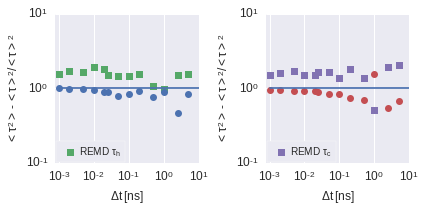

In [117]:
fig, ax = plt.subplots(1,2, figsize=(6,3))

for k, v in remd_dt_hdw_d.items():
    _exp = check_exp_w(v[:,2], v[:,0])
    lg1_remd, = ax[0].plot(int(k)*tf, _exp, "s", c=cl[1])

for k, v in remd_dt_cdw_d.items():
    _exp = check_exp_w(v[:,2], v[:,0])

    lg2_remd, = ax[1].plot(int(k)*tf, _exp, "s", c=cl[3])   

for k, v in md_dt_hdw_d.items():
    _exp = check_exp_w(v[:,2], v[:,0])
    ax[0].plot(int(k)*tf, _exp, "o", c=cl[0])

    
for k, v in md_dt_cdw_d.items():
    _exp = check_exp_w(v[:,2], v[:,0])
    ax[1].plot(int(k)*tf, _exp, "o", c=cl[2])    
    
ax[0].legend([lg1_remd], [r'REMD $\mathregular{\tau_h}$'],
               loc=3, handletextpad=-0.1, borderaxespad=0.1,
              frameon=True)
ax[1].legend([ lg2_remd], [r'REMD $\mathregular{\tau_c}$'],
               loc=3,handletextpad=-0.1, borderaxespad=0.1,
              frameon=True)




for a in ax.flat:
    a.loglog()
    #a.set_ylim(10**-1, 10**1)
    a.plot([10**-3, 10**1], [1]*2, "-")
    a.set_xlim(10**-3.1, 10**1)
    a.set_ylabel(r"$\mathregular{< \tau^2> - <\tau>^2 / <\tau>^2}$",
                fontsize=12)
    a.set_xlabel("$\mathregular{\Delta t \, [ns]}$", fontsize=12)
    a.tick_params(axis='both', which='major', labelsize=12)
    
fig.tight_layout()

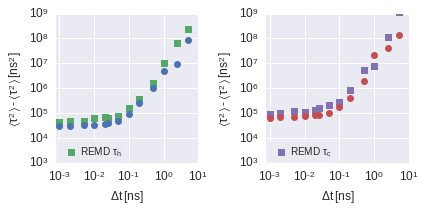

In [142]:
fig, ax = plt.subplots(1,2, figsize=(6,3))

for k, v in remd_dt_hdw_d.items():
    _exp = check_exp_w(v[:,2], v[:,0], return_mom=True)
    lg1_remd, = ax[0].plot(int(k)*tf, _exp[1][1], "s", c=cl[1])

for k, v in remd_dt_cdw_d.items():
    _exp = check_exp_w(v[:,2], v[:,0], return_mom=True)

    lg2_remd, = ax[1].plot(int(k)*tf, _exp[1][1], "s", c=cl[3])   

for k, v in md_dt_hdw_d.items():
    _exp = check_exp_w(v[:,2], v[:,0], return_mom=True)
    ax[0].plot(int(k)*tf, _exp[1][1], "o", c=cl[0])

    
for k, v in md_dt_cdw_d.items():
    _exp = check_exp_w(v[:,2], v[:,0], return_mom=True)
    ax[1].plot(int(k)*tf, _exp[1][1], "o", c=cl[2])    
    
ax[0].legend([lg1_remd], [r'REMD $\mathregular{\tau_h}$'],
               loc=3, handletextpad=-0.1, borderaxespad=0.1,
              frameon=True)
ax[1].legend([ lg2_remd], [r'REMD $\mathregular{\tau_c}$'],
               loc=3,handletextpad=-0.1, borderaxespad=0.1,
              frameon=True)




for a in ax.flat:
    a.loglog()
    a.set_ylim(10**3, 10**9)
    #a.plot([10**-3, 10**1], [1]*2, "-")
    a.set_xlim(10**-3.1, 10**1)
    a.set_ylabel(r"$\mathregular{\langle \tau^2 \rangle - \langle \tau^2 \rangle \, [ns^2]}$",
                fontsize=12)
    a.set_xlabel("$\mathregular{\Delta t \, [ns]}$", fontsize=12)
    a.tick_params(axis='both', which='major', labelsize=12)
    
fig.tight_layout()

# Visual check of the lifetime distribution

* need to compare to MD

In [118]:
from kinetics.ala_kinetics import *
from kinetics.waiting_time import *

In [119]:
ala_t_factor = 1.0/ 1000.0
_blog = np.logspace(-3,1, 5000)

In [120]:
mh_1 = remd_dt_hdw_d[1][:,2] > 0
mh_50 = remd_dt_hdw_d[50][:,2] > 0

In [121]:
fit_plot_cdf??

In [122]:
print np.max(remd_dt_hdw_d[1][:,2][mh_1] / remd_dt_hdw_d[1][:,0][mh_1])
print np.var(remd_dt_hdw_d[1][:,2][mh_1] / remd_dt_hdw_d[1][:,0][mh_1]), \
check_exp_w(remd_dt_hdw_d[1][:,2][mh_1], remd_dt_hdw_d[1][:,0][mh_1], return_mom=True)[1][1]

2977.0
91677.5419681 43746.9958621


In [123]:
np.max(md_dt_hdw_d[1][:,2])
print np.var(md_dt_hdw_d[1][:,2])

31651.5224742


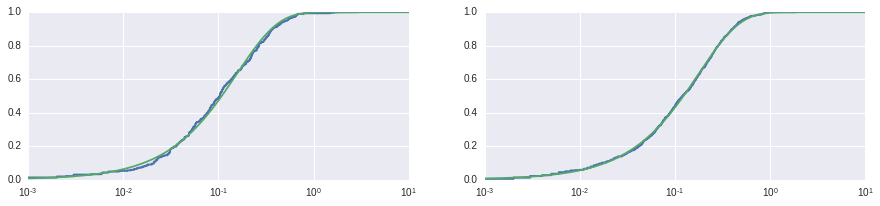

In [124]:
fig, ax = plt.subplots(1,2, figsize=(15,3))
ax[0], b, l = fit_plot_cdf(ax[0], remd_dt_hdw_d[1][:,2][mh_1] / remd_dt_hdw_d[1][:,0][mh_1] * ala_t_factor , 
                 weights=remd_dt_hdw_d[1][:,0][mh_1],
                bins=_blog)

ax[1], b, l = fit_plot_cdf(ax[1], md_dt_hdw_d[1][:,2] * ala_t_factor , 
                bins=_blog)

for a in ax:
    a.semilogx()

In [125]:
mc_1 = remd_dt_cdw_d[1][:,2] > 0

In [126]:
print np.max(remd_dt_cdw_d[1][:,2][mc_1] / remd_dt_cdw_d[1][:,0][mc_1])
print np.var(remd_dt_cdw_d[1][:,2][mc_1] / remd_dt_cdw_d[1][:,0][mc_1]), \
check_exp_w(remd_dt_cdw_d[1][:,2][mc_1], remd_dt_cdw_d[1][:,0][mc_1], return_mom=True)[1][1]

4527.0
237747.650485 97716.1784696


In [127]:
np.max(md_dt_cdw_d[1][:,2])
print np.var(md_dt_cdw_d[1][:,2])

68072.3526156


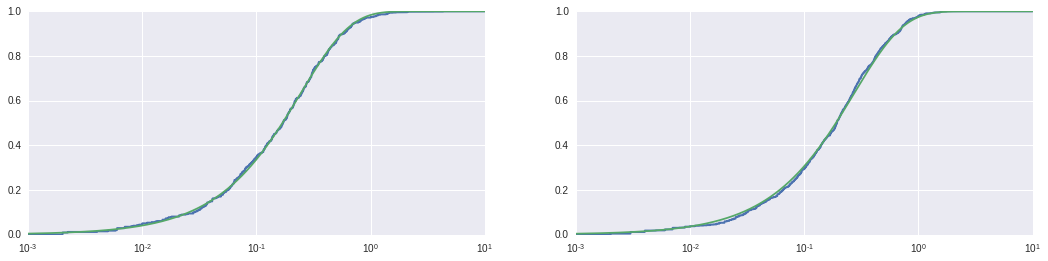

In [128]:
fig, ax = plt.subplots(1,2, figsize=(18,4))
ax[0], b, l = fit_plot_cdf(ax[0], remd_dt_cdw_d[1][:,2][mc_1] / remd_dt_cdw_d[1][:,0][mc_1] * ala_t_factor , 
                 weights=remd_dt_cdw_d[1][:,0][mc_1],
                bins=_blog)

ax[1], b, l = fit_plot_cdf(ax[1], md_dt_cdw_d[1][:,2] * ala_t_factor , 
                bins=_blog)

for a in ax:
    a.semilogx()

[]

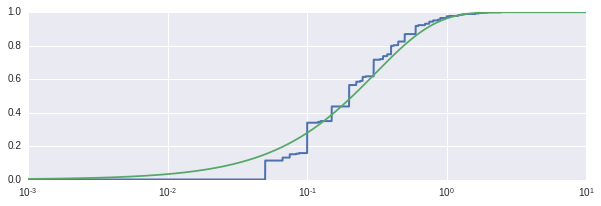

In [129]:
fig, ax = plt.subplots(figsize=(10,3))
_ = fit_plot_cdf(ax, remd_dt_hdw_d[50][:,2][mh_50] / remd_dt_hdw_d[50][:,0][mh_50] * ala_t_factor , 
                 weights=remd_dt_hdw_d[50][:,0][mh_50],
                bins=_blog)
ax.semilogx()